# ENUNCIADO DA QUESTÃO

Missão AstroJúnior: explorando novos mundos!

No ano de 2075, a humanidade expandiu suas viagens pelo universo, e jovens cadetes da Academia Espacial foram selecionados para a grande Missão AstroJúnior. Seu objetivo: explorar planetas desconhecidos e coletar dados para ajudar cientistas da Terra a entender esses novos mundos.

Cada equipe recebeu um conjunto de sensores de alta tecnologia para medir diferentes aspectos dos planetas visitados. Os dados coletados foram processados e codificados em uma escala numérica própria de modo a refletir as seguintes grandezas:


TempMédia - Temperatura média do planeta (em graus Celsius);

Gravidade - Intensidade da gravidade em relação à Terra;

PressãoAtm - Pressão atmosférica (em atmosferas terrestres);

Radiação - Nível de radiação presente no planeta;

ComposiçãoAr - Percentual de gases essenciais para a vida humana;

Hidratação - Disponibilidade de água líquida;

Vegetação - Presença de organismos vegetais;

Fauna - Diversidade de formas de vida animal;

SoloFértil - Capacidade do solo de sustentar plantação;

Ventos - Intensidade dos ventos planetários;

Luas - Número de luas orbitando o planeta;

Magnetismo - Força do campo magnético do planeta;

ClimaEstável - Estabilidade das condições climáticas ao longo do tempo;



Com base nesses dados, os cientistas classificarão os planetas em cinco categorias principais:

Classe 0: Planeta Deserto - Muito quente ou frio, sem água e com poucas chances de vida.

Classe 1: Planeta Vulcânico - Alta atividade geotérmica e atmosfera hostil.

Classe 2: Planeta Oceânico - Coberto por vastos oceanos, com possibilidades de vida aquática.

Classe 3: Planeta Florestal - Rico em vegetação, similar à Terra em muitos aspectos.

Classe 4: Planeta Gelado - Extremamente frio, mas com possibilidade de vida subterrânea ou em oceanos sob o gelo.


Agora, cadete, sua missão é analisar os dados coletados e ajudar a classificar cada planeta corretamente. O futuro da exploração espacial está em suas mãos!

A planilha de treinamento (treino.csv) fornecida tem 10.501 linhas e 13 colunas. 

A Figura 1 acima apresenta um pedaço do conjunto de treinamento. A coluna id identifica cada uma das instâncias individualmente, apresentando valores entre 0 a 10.499. A coluna target apresenta valores de 0 a 4, conforme a classificação das categorias de planetas apresentadas anteriormente.

Após treinar o seu modelo, você deve realizar a predição da planilha de teste (teste.csv). A planilha de teste fornecida tem 4.501 linhas e 13 características das instâncias (colunas). Ela contém informações semelhantes à planilha de treinamento, mas é fornecida sem os rótulos (“target”), ou seja, sem as categorias de planetas.

Quando você julgar que criou um modelo competitivo envie suas predições para as categorias dos planetas pela plataforma utilizando um arquivo com a extensão .csv no formato exato como descrito a seguir:

O arquivo .csv deve conter precisamente 4.501 linhas e 2 colunas
Na primeira célula da primeira coluna deve estar escrito a palavra id
Na primeira célula da segunda coluna deve estar escrito a palavra target
Cada linha desse arquivo, com exceção da primeira, deve conter na célula da primeira coluna o “id” (ou seja, um número correspondente à instância) e na célula da segunda coluna o “target” (0, 1, 2, 3, 4)

id, target 
onde:

O id representa o identificador único;
, [vírgula] o separador das duas colunas;
O target, um valor inteiro que pode ser: 4 (Planeta Gelado), 3 (Planeta Florestal), 2 (Planeta Oceânico), 1 (Planeta Vulcânico) ou 0 (Planeta Deserto).


Além do upload do arquivo .csv no local específico para isso, é obrigatório o envio de um pequeno relatório descrevendo: (1) o software/biblioteca utilizada, (2) os passos que o participante utilizou para criar o modelo e (3) explicar os motivos pelos quais determinadas decisões de modelagem foram tomadas. A estrutura do texto, a ser digitado no espaço específico para isso, deve possuir seguinte estrutura:

Software / Biblioteca utilizado: Orange / Scikit-learn
Passos da resolução da Prova: 1. Carregar os dados de treinamento. 2. … 3. …. 
Explicação da escolha do algoritmo de Aprendizado de Máquina: Escolhi Árvore de Decisão porque …


Os resultados serão avaliados pelo desempenho de suas predições sobre o conjunto de teste, utilizando a métrica “Medida-F”.

A Medida-F é a média harmônica entre as métricas de Precisão e Revocação. Em outras palavras, a Medida-F é uma métrica que avalia o desempenho de um modelo preditivo de modo a trazer um número único que indique a sua qualidade geral. 

O arquivo deve ser um CSV com as colunas 'id' e 'target', contendo uma linha para cada previsão (0, 1, 2, etc.)

In [12]:
# passo a passo


# passo 0: entender a empresa e o seu desafio
# passo 1: impotar a base de dados 
import pandas as pd

tabela = pd.read_csv('treino.csv')
display(tabela)

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,target
0,12251,38.763463,4.372530,2.888516,12.352539,18.906550,9.605924,3.456596,3.959477,4.738227,3.692509,11.192263,9.076242,4.692962,2
1,4529,32.192181,3.158109,2.134617,16.193530,26.786878,9.347958,5.093277,6.893790,3.399840,2.080853,19.486692,12.349952,3.217670,0
2,11284,28.370782,3.006067,1.969280,15.163950,28.515109,7.946870,5.609813,6.511194,3.256799,2.290993,18.405205,14.781329,3.231217,0
3,10993,38.215409,2.174232,2.935104,11.501867,18.419571,7.954005,4.229832,4.522060,4.869234,3.383514,12.782517,17.343742,5.009182,2
4,12927,38.904545,2.956164,2.253149,12.282552,25.547887,8.168776,3.653026,6.809110,4.971130,2.127363,19.247327,20.115183,3.560524,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,6951,30.605226,2.172545,1.456766,15.916774,33.872292,7.766799,4.455944,4.866775,5.274495,3.194181,13.756923,15.133962,4.489715,4
10496,8097,37.153719,2.930280,2.514520,10.042402,22.815845,6.018057,5.359753,5.656202,3.601738,2.760592,15.988397,19.794919,3.752870,2
10497,9011,24.316856,2.771631,2.018644,16.082389,27.999121,6.014674,6.209202,4.304756,3.905507,3.502867,12.168262,6.530749,5.191197,0
10498,12617,44.748792,3.174414,1.447737,13.578811,33.966677,8.671664,4.754359,7.941178,3.325981,1.505581,22.447345,21.038993,1.795912,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10500 non-null  int64  
 1   col_0   10500 non-null  float64
 2   col_1   10500 non-null  float64
 3   col_2   10500 non-null  float64
 4   col_3   10500 non-null  float64
 5   col_4   10500 non-null  float64
 6   col_5   10500 non-null  float64
 7   col_6   10500 non-null  float64
 8   col_7   10500 non-null  float64
 9   col_8   10500 non-null  float64
 10  col_9   10500 non-null  float64
 11  col_10  10500 non-null  float64
 12  col_11  10500 non-null  float64
 13  col_12  10500 non-null  float64
 14  target  10500 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 1.2 MB
Distribuição das classes: Counter({0: 3839, 4: 1197, 1: 1181, 2: 1022, 3: 636})


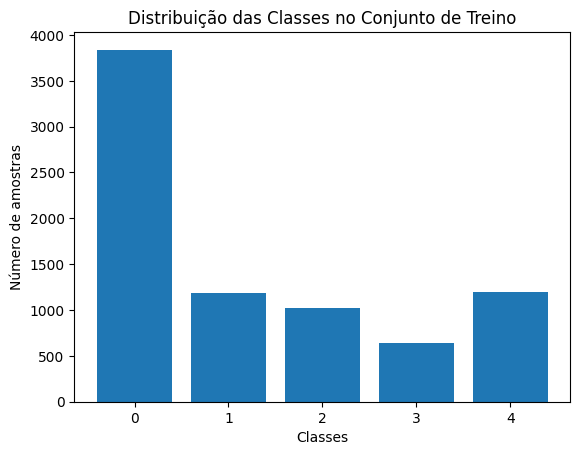

In [22]:
# passo 2: preparar a base de dados para a IA
tabela.info()

# y e quem eu quero prever
y = tabela['target']

# x e o que eu tenho para prever
x = tabela.drop(columns=['id','target'])

#separar dados de treino e dados de teste
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

# comferindo a calidade dos dados
import matplotlib.pyplot as plt
from collections import Counter

# Contar quantas amostras há em cada classe
class_counts = Counter(y_treino)
print("Distribuição das classes:", class_counts)

# Visualizar com um gráfico de barras
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Classes")
plt.ylabel("Número de amostras")
plt.title("Distribuição das Classes no Conjunto de Treino")
plt.show()


In [ ]:
# passo 3: treinar a IA 
# criar modelo

#importar modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
#nao se sairam bem pelos dados serem sesbalanceados
#from sklearn.svm import SVC
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB

#importar metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score 

In [ ]:

#criar IA
modelo_arvore = DecisionTreeClassifier()
modelo_floresta = RandomForestClassifier()
modelo_knn = KNeighborsClassifier()
modelo_xgboost = XGBClassifier(objective='multi:softprob', learning_rate=0.1, n_estimators=500, 
                               max_depth=6, min_child_weight=1, colsample_bytree=0.8, subsample=0.8, gamma=0.1)


#treinar IA
modelo_arvore.fit(x_treino, y_treino)
modelo_floresta.fit(x_treino, y_treino)
modelo_knn.fit(x_treino, y_treino)
modelo_xgboost.fit(x_treino, y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# passo 4: qual o melhor modelo de IA
previsao_arvore = modelo_arvore.predict(x_teste)
previsao_floresta = modelo_floresta.predict(x_teste)
previsao_knn = modelo_knn.predict(x_teste) 
previsao_xgboost = modelo_xgboost.predict(x_teste)


display(accuracy_score(y_teste, previsao_arvore))
display(accuracy_score(y_teste, previsao_floresta))
display(accuracy_score(y_teste, previsao_knn))
display(accuracy_score(y_teste, previsao_xgboost))

print(classification_report(y_teste, previsao_arvore))
print(classification_report(y_teste, previsao_floresta))
print(classification_report(y_teste, previsao_knn))
print(classification_report(y_teste, previsao_xgboost))

print(confusion_matrix(y_teste, previsao_arvore))
print(confusion_matrix(y_teste, previsao_floresta))
print(confusion_matrix(y_teste, previsao_knn))
print(confusion_matrix(y_teste, previsao_xgboost))

print(f1_score(y_teste, previsao_arvore, average='macro'))
print(f1_score(y_teste, previsao_floresta, average='macro'))
print(f1_score(y_teste, previsao_knn, average='macro'))
print(f1_score(y_teste, previsao_xgboost, average='macro'))

print(f1_score(y_teste, previsao_arvore, average='weighted'))
print(f1_score(y_teste, previsao_floresta, average='weighted'))
print(f1_score(y_teste, previsao_knn, average='weighted'))
print(f1_score(y_teste, previsao_xgboost, average='weighted'))




0.6163809523809524

0.7596190476190476

0.6971428571428572

0.512

0.5927619047619047

0.5455238095238095

0.7725714285714286

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1278
           1       0.55      0.51      0.53       426
           2       0.46      0.46      0.46       345
           3       0.32      0.37      0.34       198
           4       0.51      0.53      0.52       378

    accuracy                           0.62      2625
   macro avg       0.52      0.53      0.52      2625
weighted avg       0.62      0.62      0.62      2625

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1278
           1       0.72      0.62      0.66       426
           2       0.69      0.61      0.65       345
           3       0.65      0.35      0.45       198
           4       0.76      0.66      0.70       378

    accuracy                           0.76      2625
   macro avg       0.72      0.63      0.67      2625
weighted avg       0.75      0.76      0.75      2625

              precisio

In [17]:
# novo treiramento com ajustes

modelo_floresta2 = RandomForestClassifier(
    n_estimators=300, 
    max_depth=30, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    max_features='sqrt', 
    bootstrap=True,  
    class_weight='balanced', 
    random_state=42)

modelo_knn2 = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None)

modelo_xgboost2 = XGBClassifier(
    objective='multi:softprob',
    learning_rate=0.1,
    n_estimators=500,
    max_depth=6, 
    min_child_weight=1, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    gamma=0.1)



In [18]:
# passo 4: qual o melhor modelo de IA com ajustes
modelo_floresta2.fit(x_treino, y_treino)
modelo_knn2.fit(x_treino, y_treino)
modelo_xgboost2.fit(x_treino, y_treino)

previsao_floresta2 = modelo_floresta2.predict(x_teste)
previsao_knn2 = modelo_knn2.predict(x_teste) 
previsao_xgboost2 = modelo_xgboost2.predict(x_teste) 

display(accuracy_score(y_teste, previsao_floresta2))
display(accuracy_score(y_teste, previsao_knn2))
display(accuracy_score(y_teste, previsao_xgboost2))

print(classification_report(y_teste, previsao_floresta2))
print(classification_report(y_teste, previsao_knn2))
print(classification_report(y_teste, previsao_xgboost2))

print(confusion_matrix(y_teste, previsao_floresta2))
print(confusion_matrix(y_teste, previsao_knn2))
print(confusion_matrix(y_teste, previsao_xgboost2))

0.768

0.6971428571428572

0.7725714285714286

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1278
           1       0.74      0.65      0.69       426
           2       0.67      0.63      0.65       345
           3       0.61      0.46      0.53       198
           4       0.74      0.70      0.72       378

    accuracy                           0.77      2625
   macro avg       0.71      0.67      0.69      2625
weighted avg       0.76      0.77      0.76      2625

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1278
           1       0.59      0.58      0.59       426
           2       0.55      0.52      0.54       345
           3       0.54      0.26      0.35       198
           4       0.68      0.52      0.59       378

    accuracy                           0.70      2625
   macro avg       0.63      0.56      0.58      2625
weighted avg       0.68      0.70      0.68      2625

              precisio

In [19]:
# passo 5: usar o melhor modelo para faser a previsao
# qual o melhor modelo? 

#importar tabela de novos cliemtes
tabela_nova = pd.read_csv('teste.csv')

# Armazena a coluna 'id' separadamente
ids = tabela_nova["id"]

# Remove a coluna 'id' antes da previsão
tabela_nova_sem_id = tabela_nova.drop(columns=['id'], errors='ignore')

# Faz a previsão
nova_previsao = modelo_floresta2.predict(tabela_nova_sem_id)

# Criar um DataFrame com os IDs e as previsões
resultado = pd.DataFrame({"id": ids, "target": nova_previsao})

display(tabela_nova)

display(nova_previsao)

# Exibir o resultado
display(resultado)

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12
0,2142,37.555079,3.205281,1.583984,11.330132,32.542511,6.581602,5.524091,5.202632,3.288405,3.009713,14.706292,20.530879,2.889453
1,3846,28.933095,3.905861,2.171001,14.644065,26.406560,9.515010,4.023027,6.528586,4.202300,2.281440,18.454367,14.862851,3.183574
2,6177,37.082903,3.259937,1.887675,12.313557,29.368109,6.533770,5.088085,5.913968,3.925079,2.619016,16.717026,16.871735,3.512345
3,11779,24.011327,4.599539,2.102587,17.349264,27.121683,12.231295,2.664319,5.226405,5.232794,2.996656,14.773491,9.133299,3.739929
4,1593,31.403592,2.543982,0.533288,14.778941,43.525198,5.225097,7.100292,4.516120,2.753415,3.386776,12.765727,16.675742,3.000528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,11496,37.789367,3.511433,2.814992,10.697124,19.675079,9.844242,3.994824,5.082404,3.762631,3.075747,14.366443,20.097503,3.278142
4496,8856,24.889203,2.508254,2.525974,15.868246,22.696114,6.931519,7.380456,6.599213,1.865822,2.242648,18.654010,10.229343,3.687254
4497,4937,39.208404,2.843656,1.975679,14.071951,28.448221,7.391533,5.525009,3.912253,3.788423,3.718447,11.058774,10.266351,4.531029
4498,7574,24.559490,2.084494,3.359952,12.531981,13.978740,6.302277,6.162282,4.496384,3.523565,3.397616,12.709938,12.636072,5.461903


array([0, 0, 0, ..., 3, 4, 0], shape=(4500,))

,id,target
0,2142,0
1,3846,0
2,6177,0
3,11779,0
4,1593,0
...,...,...
4495,11496,1
4496,8856,4
4497,4937,3
4498,7574,4


In [ ]:
# Salvando para CSV
df = pd.DataFrame(resultado)

df.to_csv("resposta.csv", index=False, header=True, encoding="utf-8")


